In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Netflix\Practice\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The Dataset has missing value in Rating, Type and content Rating column

In [6]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [10]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [11]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [12]:
df['Reviews'].str.isnumeric().sum()

# used to count the number of numeric values in the 'Reviews' column.
# is numeric used to check number present or not
# isnumeric.sum() is there to count pure numerical values

10840

In [13]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df_copy=df.copy()

In [15]:
df_copy=df_copy.drop(df_copy.index[10472])
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)


In [17]:
df_copy['Size'].str.isnumeric().sum()

0

In [18]:
df_copy[~df_copy['Size'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')   #M is replaced by 000 
df_copy['Size']=df_copy['Size'].str.replace('k','')       #Remove K
df_copy['Size']=df_copy['Size'].replace('Varies with device', np.nan) 
df_copy['Size']=df_copy['Size'].astype(float)


In [21]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
df_copy['Installs']=df_copy['Installs'].str.replace(',','').str.replace('+','')
df_copy['Installs']=df_copy['Installs'].astype(int)

C:\Users\ptt920460\AppData\Local\Temp\ipykernel_12116\1065527030.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['Installs']=df_copy['Installs'].str.replace(',','').str.replace('+','')


In [23]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
df_copy['Price'] = df_copy['Price'].replace('[\$,]', '', regex=True).astype(float)


In [25]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [26]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

In [27]:
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [28]:
df_copy['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

EDA

In [29]:
df_copy[df_copy.duplicated('App')].shape

# App column has duplicate values

(1181, 16)

In [30]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [31]:
df_copy[df_copy.duplicated('App')].shape

(0, 16)

In [32]:
df_copy.shape

(9659, 16)

In [33]:
numeric_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype !='O']
categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print('we have {} numeric feature :{}'.format(len(numeric_feature),numeric_feature))
print('\n we have {} categorical feature: {}'.format(len(categorical_feature),categorical_feature))

we have 9 numeric feature :['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

 we have 7 categorical feature: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


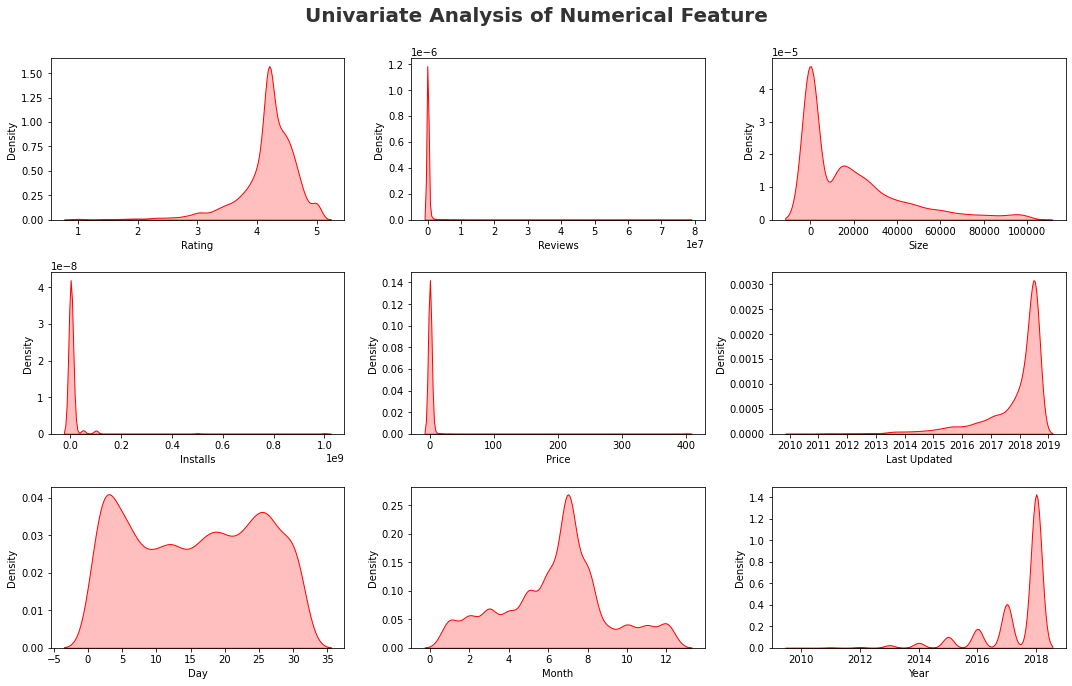

In [35]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]],shade=True,color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

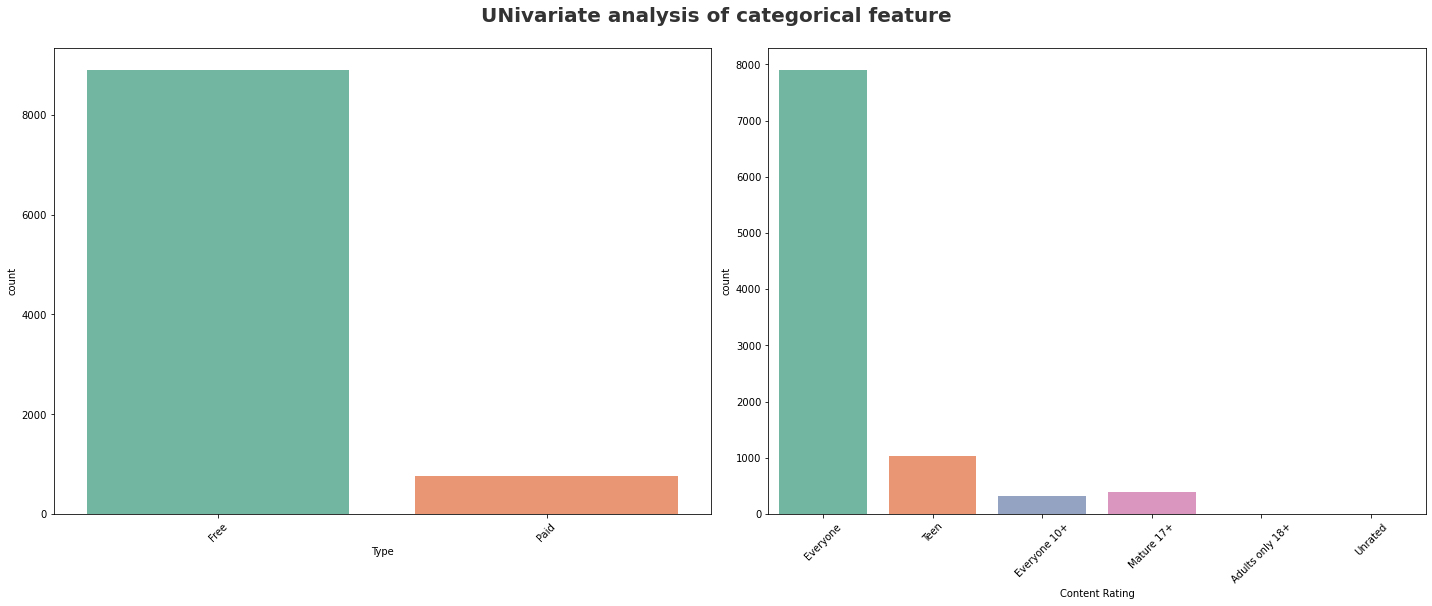

In [36]:
plt.figure(figsize=(20,15))
plt.suptitle("UNivariate analysis of categorical feature",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']

for i in range(0,len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_copy[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [37]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [38]:
most_popular=df_copy.groupby('Category')['Installs'].count()

In [39]:
most_popular_category=most_popular.idxmax()
most_popular_category

'FAMILY'

In [40]:
list_popular_category=most_popular.idxmin()
list_popular_category

'BEAUTY'

<AxesSubplot:ylabel='Category'>

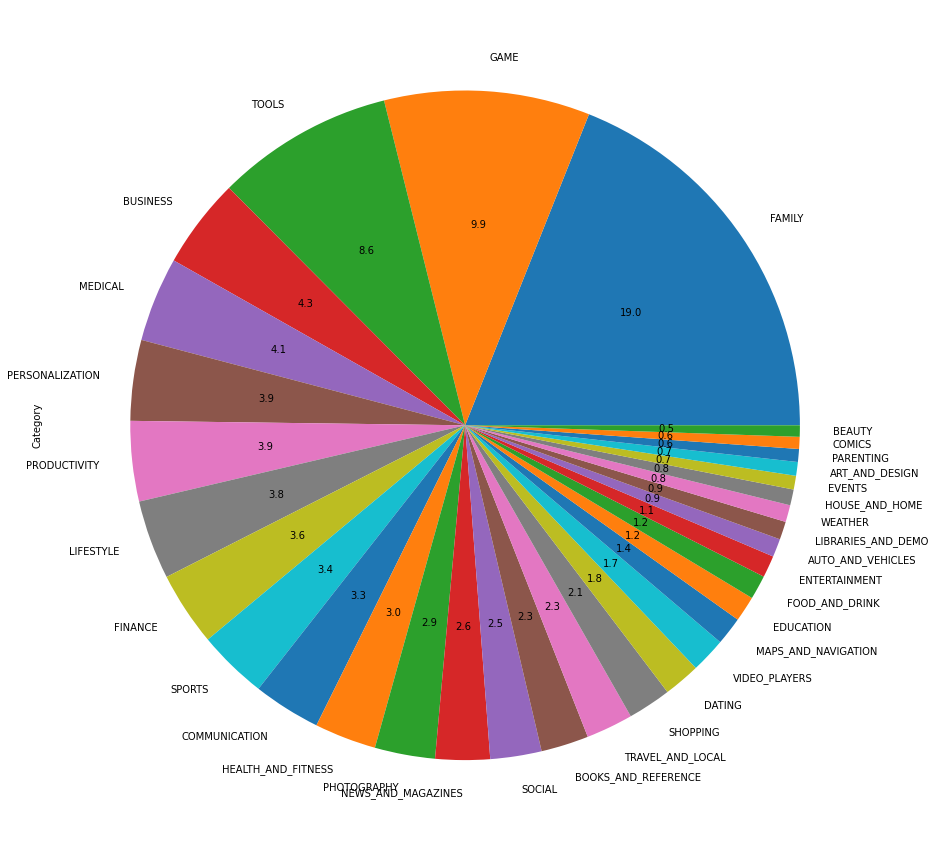

In [41]:

df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

In [42]:
sort_category=most_popular.sort_values(ascending=False)
sort_category.head(10)

Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Installs, dtype: int64

In [43]:
category=pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns= {'Category':'Count'},inplace=True)
category.head(10)

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


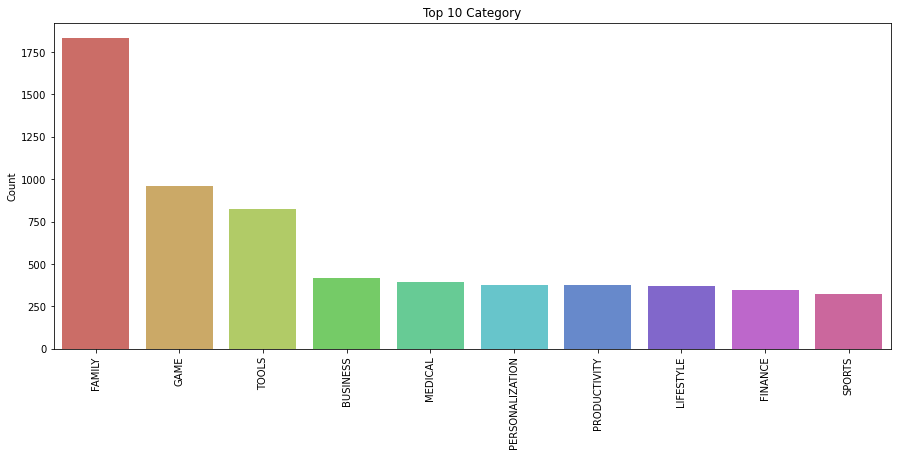

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(data= category[:10],x=category.index[:10],y='Count',palette='hls')
plt.title('Top 10 Category')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Most popular categories in playstore')

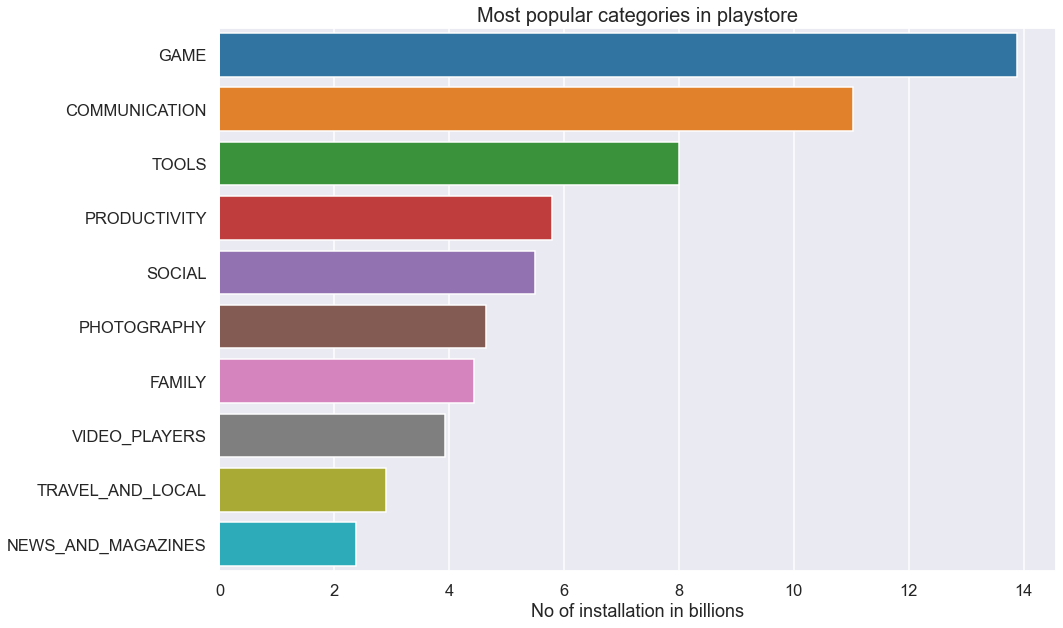

In [45]:
largest_install=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
largest_install.Installs=largest_install.Installs/1000000000
df2=largest_install.head(10)
plt.figure(figsize=(15,10))
sns.set_context('talk')
sns.set_style('darkgrid')
ax=sns.barplot(data=df2,x='Installs',y='Category')
ax.set_xlabel('No of installation in billions')
ax.set_ylabel('')
ax.set_title('Most popular categories in playstore', size=20)


In [46]:
Five_star_Rating_apps=df_copy[df_copy['Rating']==5.0][['App','Rating']]
Five_star_Rating_apps


,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
...,...,...
10721,Mad Dash Fo' Cash,5.0
10742,GKPB FP Online Church,5.0
10776,Monster Ride Pro,5.0
10820,Fr. Daoud Lamei,5.0


In [47]:
top5_app_category=df_copy.groupby(['Category']).apply(lambda group: group.nlargest(5, 'Installs'))
df3=top5_app_category[['Category','App','Installs']]
df3.head(25)

Category  \
Category                                         
ART_AND_DESIGN      3           ART_AND_DESIGN   
                    12          ART_AND_DESIGN   
                    19          ART_AND_DESIGN   
                    42          ART_AND_DESIGN   
                    45          ART_AND_DESIGN   
AUTO_AND_VEHICLES   72       AUTO_AND_VEHICLES   
                    8289     AUTO_AND_VEHICLES   
                    67       AUTO_AND_VEHICLES   
                    69       AUTO_AND_VEHICLES   
                    70       AUTO_AND_VEHICLES   
BEAUTY              117                 BEAUTY   
                    7021                BEAUTY   
                    99                  BEAUTY   
                    102                 BEAUTY   
                    105                 BEAUTY   
BOOKS_AND_REFERENCE 152    BOOKS_AND_REFERENCE   
                    139    BOOKS_AND_REFERENCE   
                    143    BOOKS_AND_REFERENCE   
                    3941   BOOKS_AND_REFERENCE   
                    5651   BOOKS_AND_REFERENCE   
BUSINESS            194               BUSINESS   
                    10253             BUSINESS   
                    188               BUSINESS   
                    192               BUSINESS   
                    201               BUSINESS   

                                                                         App  \
Category                                                                       
ART_AND_DESIGN      3                                  Sketch - Draw & Paint   
                    12                        Tattoo Name On My Photo Editor   
                    19                                          ibis Paint X   
                    42                            Textgram - write on photos   
                    45     Canva: Poster, banner, card maker & graphic de...   
AUTO_AND_VEHICLES   72         Android Auto - Maps, Media, Messaging & Voice   
                    8289                       AutoScout24 - used car finder   
                    67                                    Ulysse Speedometer   
                    69                           Used cars for sale - Trovit   
                    70     Fines of the State Traffic Safety Inspectorate...   
BEAUTY              117                        Beauty Camera - Selfie Camera   
                    7021                        Best Hairstyles step by step   
                    99                        ipsy: Makeup, Beauty, and Tips   
                    102                           Mirror - Zoom & Exposure -   
                    105                                   Filters for Selfie   
BOOKS_AND_REFERENCE 152                                    Google Play Books   
                    139                                 Wattpad 📖 Free Books   
                    143                                        Amazon Kindle   
                    3941                                               Bible   
                    5651                             Audiobooks from Audible   
BUSINESS            194               OfficeSuite : Free Office + PDF Editor   
                    10253             File Commander - File Manager/Explorer   
                    188                                    Indeed Job Search   
                    192                        Docs To Go™ Free Office Suite   
                    201                               Facebook Pages Manager   

                             Installs  
Category                               
ART_AND_DESIGN      3        50000000  
                    12       10000000  
                    19       10000000  
                    42       10000000  
                    45       10000000  
AUTO_AND_VEHICLES   72       10000000  
                    8289     10000000  
                    67        5000000  
                    69        5000000  
                    70        5000000  
BEAUTY              117      10000000  
      

Insights:
1)Top Five Category as per most installed apps are ART & Design, Auto & Vehicles, Beauty, Books & Reference, Business

2)There are 271 Five Star Rating apps

3)Most popular categories in playstore are Game, Communication, Tools, Productivity, Social as per app installation



In [48]:
Box=df_copy.groupby(['Category'])['Rating'].median().sort_values(ascending=False).index
Box

Index(['ART_AND_DESIGN', 'COMICS', 'EDUCATION', 'HEALTH_AND_FITNESS',
       'PARENTING', 'BOOKS_AND_REFERENCE', 'PERSONALIZATION', 'GAME', 'EVENTS',
       'AUTO_AND_VEHICLES', 'SPORTS', 'SOCIAL', 'SHOPPING', 'PRODUCTIVITY',
       'PHOTOGRAPHY', 'MAPS_AND_NAVIGATION', 'WEATHER', 'FOOD_AND_DRINK',
       'FINANCE', 'FAMILY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MEDICAL', 'NEWS_AND_MAGAZINES', 'DATING', 'COMMUNICATION', 'BUSINESS',
       'BEAUTY', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS',
       'HOUSE_AND_HOME'],
      dtype='object', name='Category')

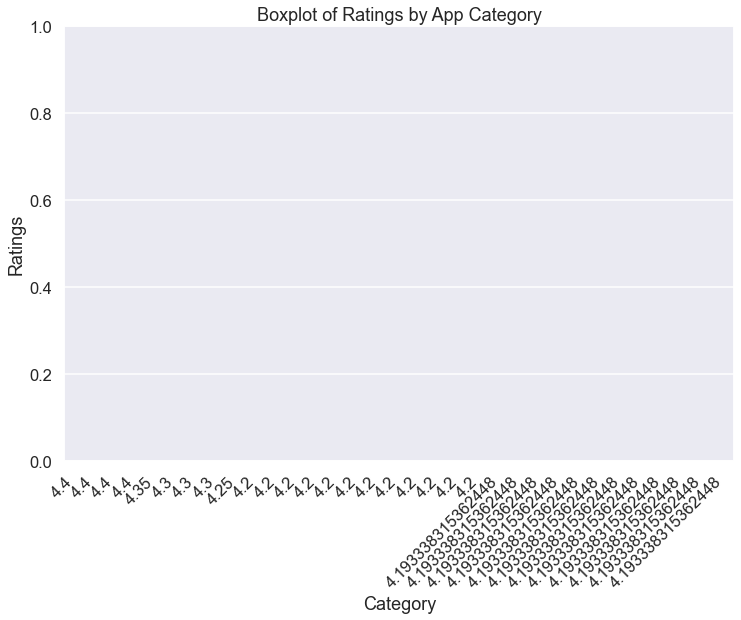

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_copy,x=df_copy['Category'],y=df_copy['Rating'],order=df_copy.groupby(['Category'])['Rating'].median().sort_values(ascending=False))
plt.title('Boxplot of Ratings by App Category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.xticks(rotation=45,ha='right')
plt.show()